## Clustering - k-means

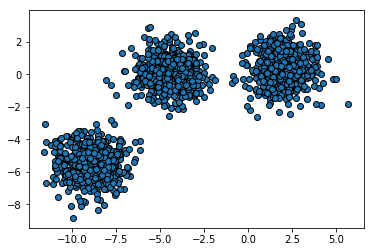

In [1]:
# Adapted from: 
## Author: Phil Roth <mr.phil.roth@gmail.com>
## License: BSD 3 clause

from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], edgecolors='black')
plt.show()

In [2]:
def distance(v1, v2):
    d = 0
    for dim in range(len(v1)):
        d += (v1[dim]-v2[dim])*(v1[dim]-v2[dim])
    return d

In [3]:
def construct_colors(y_pred):
    colors = []
    for y in y_pred:
        if y == 0:
            colors.append([0.99,0,0])
        elif y == 1:
            colors.append([0,0.99,0])
        elif y == 2:
            colors.append([0,0,0.99])
        else:
            colors.append([0.99,0.99,0])
    return colors

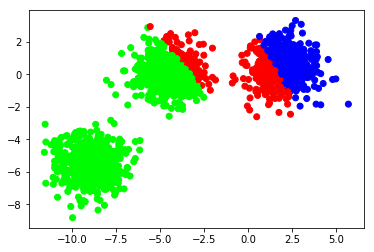

C:\Users\gde\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:889: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


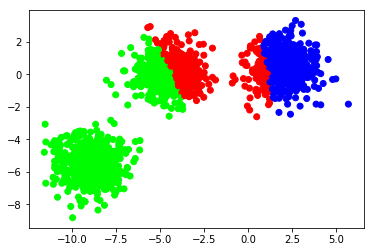

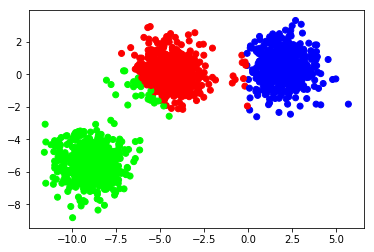

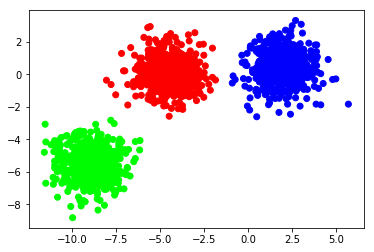

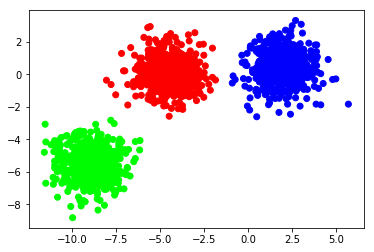

In [4]:
import numpy as np

from sklearn.cluster import KMeans

c1, c2, c3 = [0,1], [-5,-3], [2,2]
centroids = np.asarray([c1,c2,c3])

# create for iteration 0
colors = [[0.99,0,0], [0,0.99,0],[0,0,0.99]]
labels = []
for x in X:
    d = [distance(x, c1), distance(x, c2), distance(x, c3)] 
    labels.append(colors[np.argmin(d)])

plt.scatter(X[:, 0], X[:, 1], facecolors=labels)
plt.show()

estimators = {'k_means_1': KMeans(n_clusters=3, max_iter=1, init=centroids),
              'k_means_2': KMeans(n_clusters=3, max_iter=2, init=centroids),
              'k_means_3': KMeans(n_clusters=3, max_iter=3, init=centroids),
              'k_means_4': KMeans(n_clusters=3, max_iter=4, init=centroids)
             }

# Incorrect number of clusters
for name, estimator in estimators.items():
    y_pred = estimator.fit_predict(X)
    colors = construct_colors(y_pred)

    plt.scatter(X[:, 0], X[:, 1], c=colors)
    plt.show()    